<a href="https://colab.research.google.com/github/alexagray/symmetrical-spoon/blob/main/Copy_of_lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Lab 5"
format: html
editor: visual
execute:
  echo: true
  eval: true
  freeze: auto
jupyter: false
---

In this lab, you’ll build and evaluate a simple fully‑connected neural network on the Fashion‑MNIST dataset, then explore two classic regularization strategies: $L_2$ weight decay and Dropout to combat overfitting.

## Dataset Description

The **Fashion‑MNIST** dataset is a drop‑in replacement for the original MNIST (handwritten digits) dataset, but contains 70,000 grayscale images of Zalando’s article images:

- **Total images**: 70,000 (60,000 training, 10,000 test)
- **Image size**: 28×28 pixels
- **Color**: Grayscale (single channel)
- **Classes**: 10 categories (T‑shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)
- **Source**: Provided by Zalando Research, publicly available via [GitHub](https://github.com/zalandoresearch/fashion-mnist) and built into Keras/TensorFlow

Each class is balanced with exactly 6,000 images in the training set and 1,000 in the test set, making it ideal for benchmarking new models.

## Load Data & Inspect Examples


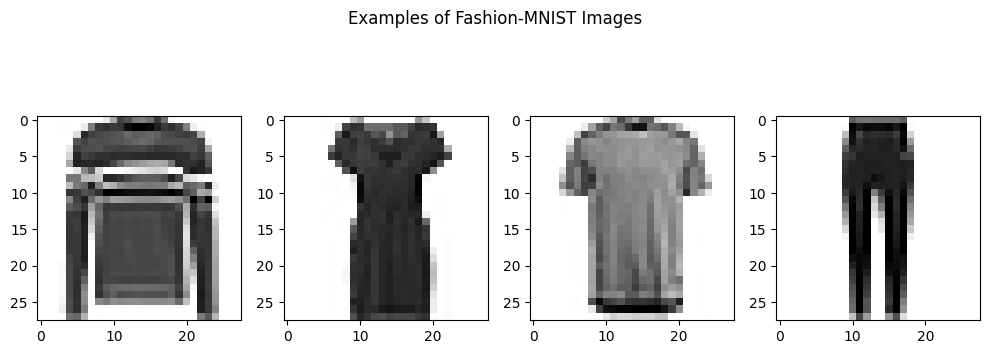

In [ ]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Let's Load The data
(fx_train, fy_train), (fx_test, fy_test) = tf.keras.datasets.fashion_mnist.load_data()

## Assign class names
y = fy_train.flatten()

label_map = {
    0: "T‑shirt/top", 1: "Trouser",     2: "Pullover",
    3: "Dress",       4: "Coat",        5: "Sandal",
    6: "Shirt",       7: "Sneaker",     8: "Bag",
    9: "Ankle boot"
}

#### Assigning true labels
df = pd.DataFrame({'label': y})
df['class_name']  = df['label'].map(label_map)

indices = [5, 20, 789, 4567]  #indices of examples to plot
fig, axes = plt.subplots(1, len(indices), figsize=(10, 4))
fig.suptitle("Examples of Fashion‑MNIST Images")
for ax, idx in zip(axes, indices):
    ax.imshow(fx_train[idx], cmap='binary')

plt.tight_layout()
plt.show()


Now we print the annotated true labels:


In [ ]:
print(df.class_name[indices])


5          Pullover
20            Dress
789     T‑shirt/top
4567        Trouser
Name: class_name, dtype: object


Let's see if the classes are balanced:


In [ ]:
### Explore Classes distribution
summary = (
    df['label']
      .value_counts(sort=False)
      .rename_axis('label')
      .reset_index(name='count')
)
summary['percent']     = 100 * summary['count'] / summary['count'].sum()
summary['class_name']  = summary['label'].map(label_map)

# Reorder and drop count
summary = summary[['label', 'class_name', 'percent']]
print(summary)

   label   class_name  percent
0      9   Ankle boot     10.0
1      0  T‑shirt/top     10.0
2      3        Dress     10.0
3      2     Pullover     10.0
4      7      Sneaker     10.0
5      5       Sandal     10.0
6      1      Trouser     10.0
7      6        Shirt     10.0
8      4         Coat     10.0
9      8          Bag     10.0


Now we preprocess the data and build the Neural Network architecture:


In [ ]:
#### Rehsape images into vectors
x_train = fx_train.reshape(-1, 28*28) / 255.0
x_test  = fx_test.reshape(-1, 28*28)  / 255.0

###Build model
model = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In this next step we actually train our feed‐forward network on the Fashion‑MNIST training data and simultaneously hold out 20% of it for validation. Here’s what happens:



In [ ]:
###Training the model
history = model.fit(
    x_train, fy_train,
    validation_split=0.2, ##20% for validation
    epochs=30,
    batch_size=256
)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6826 - loss: 0.9530 - val_accuracy: 0.8354 - val_loss: 0.4775
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8507 - loss: 0.4295 - val_accuracy: 0.8558 - val_loss: 0.4207
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8647 - loss: 0.3800 - val_accuracy: 0.8636 - val_loss: 0.3880
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8769 - loss: 0.3448 - val_accuracy: 0.8722 - val_loss: 0.3667
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8808 - loss: 0.3309 - val_accuracy: 0.8746 - val_loss: 0.3583
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8876 - loss: 0.3070 - val_accuracy: 0.8723 - val_loss: 0.3521
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8914 - loss: 0.2960 - val_accuracy: 0.8817 - val_loss: 0.3382
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8960 - loss: 0.2842 - val_accuracy: 


We can plot the training vs.validation loss curves with:


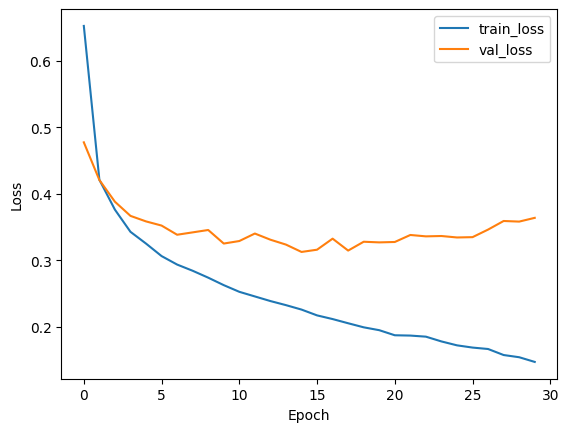

In [ ]:
####Plot training Loss and validation loss over epochs
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()


This visualization lets us see how quickly the model is learning (the downward slope of the training loss), and how the validation loss eventually starts rising (a classic sign of over‑fitting once the network has learned too much noise).

## Fixing Overfitting

### L2 Weight Regularization

Penalize large weights by adding an $l_2$ penalty to the loss:


Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6804 - loss: 1.2424 - val_accuracy: 0.8353 - val_loss: 0.6752
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8430 - loss: 0.6517 - val_accuracy: 0.8563 - val_loss: 0.5828
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8578 - loss: 0.5742 - val_accuracy: 0.8586 - val_loss: 0.5546
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8636 - loss: 0.5343 - val_accuracy: 0.8591 - val_loss: 0.5435
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8685 - loss: 0.5067 - val_accuracy: 0.8583 - val_loss: 0.5129
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8697 - loss: 0.4920 - val_accuracy: 0.8685 - val_loss: 0.4853
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8787 - loss: 0.4618 - val_accuracy: 0.8644 - val_loss: 0.4873
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8802 - loss: 0.4510 - val_accuracy: 

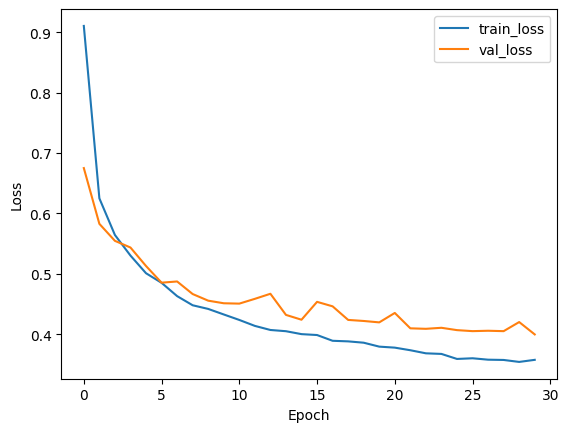

In [ ]:
from keras.regularizers import l2
model_l2 = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=l2(1e-3)), ## Penalty coefficient lambda = 1e-3
    layers.Dense(64, activation='relu',
                 kernel_regularizer=l2(1e-3)),
    layers.Dense(10, activation='softmax')
])

model_l2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_l2.fit(
    x_train, fy_train,
    validation_split=0.2, ##20% for validation
    epochs=30,
    batch_size=256
)

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()


### Dropout

Randomly “drop” a fraction of neurons each update so the network can’t rely on any one feature:


Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5421 - loss: 1.3105 - val_accuracy: 0.8155 - val_loss: 0.5121
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7835 - loss: 0.6106 - val_accuracy: 0.8403 - val_loss: 0.4424
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8152 - loss: 0.5313 - val_accuracy: 0.8500 - val_loss: 0.4146
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8269 - loss: 0.4954 - val_accuracy: 0.8593 - val_loss: 0.3964
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8353 - loss: 0.4642 - val_accuracy: 0.8613 - val_loss: 0.3818
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8385 - loss: 0.4528 - val_accuracy: 0.8619 - val_loss: 0.3798
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8404 - loss: 0.4352 - val_accuracy: 0.8680 - val_loss: 0.3669
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8461 - loss: 0.4364 - val_accuracy:

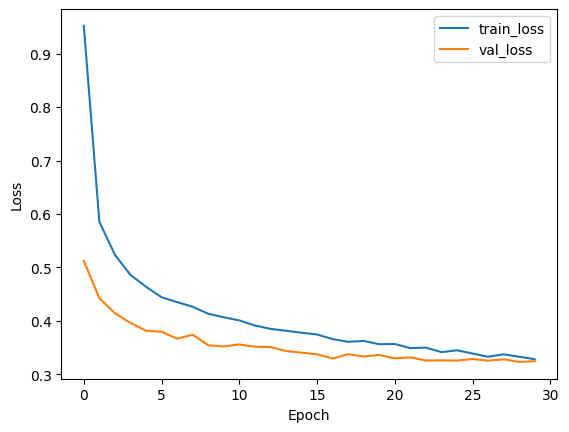

In [ ]:
model_do = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),              #drop 50% of activations
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),              #drop 30% activations
    layers.Dense(10, activation='softmax')
])

model_do.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_do.fit(
    x_train, fy_train,
    validation_split=0.2, ##20% for validation
    epochs=30,
    batch_size=256
)

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()



## Final Evaluation

Evaluate your all three models on the held‑out test set:


In [ ]:
for name, m in [('Baseline', model),
                ('L2',       model_l2),
                ('Dropout',  model_do)]:
    loss, acc = m.evaluate(x_test, fy_test, verbose=0)
    print(f"{name} Test Accuracy: {acc:.4f}")


Baseline Test Accuracy: 0.8823
L2 Test Accuracy: 0.8763
Dropout Test Accuracy: 0.8762




---

## Extensions & Questions

1. **Combine** both $L_2$ penalty and Dropout in a single model.  Does it outperform either alone?  
2. **Hyperparameter tuning:**  
   - Sweep $\lambda \in \{10^{-1},10^{-2},10^{-3}\}$ for $L_2$
   - Vary Dropout $rates \in \{0.2, 0.5, 0.7\}$  
   - Try different batch sizes (64, 128, 256) and optimizers (SGD, Adam, RMSprop)  
   - Increase the number of epochs
3. **Model depth:** Increase or decrease the number of hidden layers/units. How does capacity affect overfitting?
4. **Visualize misclassifications:** Plot some examples the model got wrong—what patterns do you observe?









Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5393 - loss: 1.5760 - val_accuracy: 0.8129 - val_loss: 0.7443
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7827 - loss: 0.8351 - val_accuracy: 0.8353 - val_loss: 0.6382
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8065 - loss: 0.7241 - val_accuracy: 0.8445 - val_loss: 0.5864
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8251 - loss: 0.6562 - val_accuracy: 0.8491 - val_loss: 0.5563
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8244 - loss: 0.6385 - val_accuracy: 0.8552 - val_loss: 0.5302
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8328 - loss: 0.6059 - val_accuracy: 0.8499 - val_loss: 0.5196
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8316 - loss: 0.5935 - val_accuracy: 0.8556 - val_loss: 0.5053
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8379 - loss: 0.5675 - val_accurac

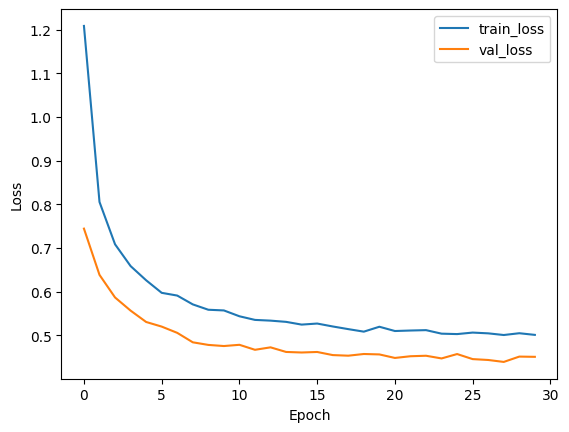

L2 + Dropout Test Accuracy: 0.8614


In [ ]:
# Combine both  𝐿2  penalty and Dropout in a single model. Does it outperform either alone?

model_l2_do = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(1e-3)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(1e-3)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model_l2_do.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_l2_do.fit(
    x_train, fy_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256
)

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()

loss, acc = model_l2_do.evaluate(x_test, fy_test, verbose=0)
print(f"L2 + Dropout Test Accuracy: {acc:.4f}")


In [ ]:
# prompt: Hyperparameter tuning:
# Sweep  𝜆∈{10−1,10−2,10−3}  for  𝐿2
# Vary Dropout  𝑟𝑎𝑡𝑒𝑠∈{0.2,0.5,0.7}
# Try different batch sizes (64, 128, 256) and optimizers (SGD, Adam, RMSprop)
# Increase the number of epochs

import itertools

l2_lambdas = [1e-1, 1e-2, 1e-3]
dropout_rates = [0.2, 0.5, 0.7]
batch_sizes = [64, 128, 256]
optimizers = ['SGD', 'Adam', 'RMSprop']

for l2_lambda, dropout_rate, batch_size, optimizer in itertools.product(l2_lambdas, dropout_rates, batch_sizes, optimizers):
    print(f"Training with l2_lambda={l2_lambda}, dropout_rate={dropout_rate}, batch_size={batch_size}, optimizer={optimizer}")

    model_tuned = models.Sequential([
        layers.Input(shape=(28*28,)),
        layers.Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda)),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])

    model_tuned.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    history = model_tuned.fit(
        x_train, fy_train,
        validation_split=0.2,
        epochs=50, # Increased epochs
        batch_size=batch_size,
        verbose=0 # Suppress training output for each combination
    )

    loss, acc = model_tuned.evaluate(x_test, fy_test, verbose=0)
    print(f"Test Accuracy: {acc:.4f}")
    print("-" * 20)


Training with l2_lambda=0.1, dropout_rate=0.2, batch_size=64, optimizer=SGD
Test Accuracy: 0.7658
--------------------
Training with l2_lambda=0.1, dropout_rate=0.2, batch_size=64, optimizer=Adam
Test Accuracy: 0.7835
--------------------
Training with l2_lambda=0.1, dropout_rate=0.2, batch_size=64, optimizer=RMSprop


KeyboardInterrupt: 

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5379 - loss: 1.2854 - val_accuracy: 0.8212 - val_loss: 0.4876
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7936 - loss: 0.5863 - val_accuracy: 0.8471 - val_loss: 0.4191
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8222 - loss: 0.5036 - val_accuracy: 0.8491 - val_loss: 0.4033
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8375 - loss: 0.4565 - val_accuracy: 0.8600 - val_loss: 0.3763
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8397 - loss: 0.4432 - val_accuracy: 0.8673 - val_loss: 0.3712
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8501 - loss: 0.4272 - val_accuracy: 0.8673 - val_loss: 0.3631
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8533 - loss: 0.4122 - val_accuracy: 0.8679 - val_loss: 0.3534
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8531 - loss: 0.4122 - val_accu

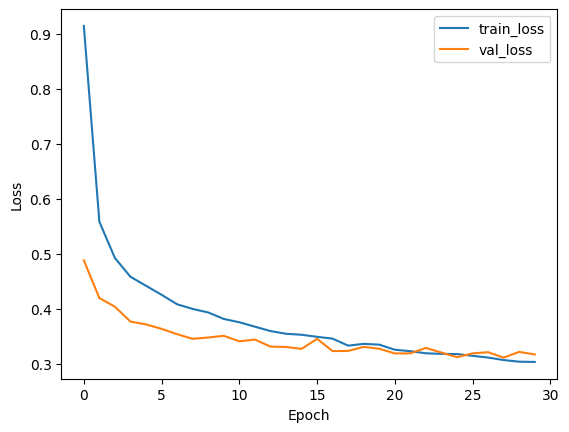

Deep Model Test Accuracy: 0.8798
Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5844 - loss: 1.1879 - val_accuracy: 0.8117 - val_loss: 0.5557
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8195 - loss: 0.5404 - val_accuracy: 0.8323 - val_loss: 0.4824
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8413 - loss: 0.4656 - val_accuracy: 0.8454 - val_loss: 0.4463
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8511 - loss: 0.4285 - val_accuracy: 0.8425 - val_loss: 0.4379
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8541 - loss: 0.4195 - val_accuracy: 0.8565 - val_loss: 0.4128
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8606 - loss: 0.4027 - val_accuracy: 0.8537 - val_loss: 0.4174
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8609 - loss: 0.4030 - val_accuracy: 0.8635 - val_loss: 0.3966
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8711 

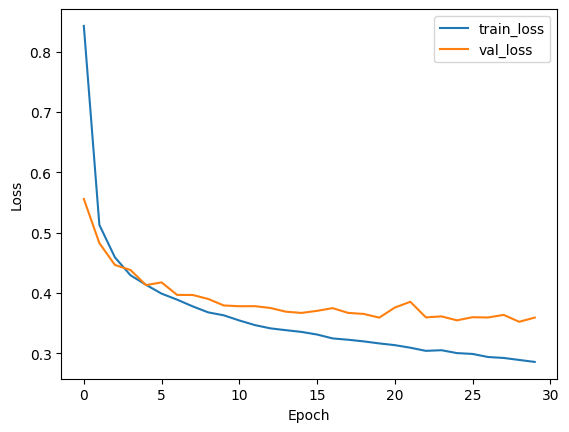

Shallow Model Test Accuracy: 0.8668


In [ ]:
# prompt: Model depth: Increase or decrease the number of hidden layers/units.

# Model depth: Increase or decrease the number of hidden layers/units.

# Increased depth model
model_deep = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model_deep.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_deep = model_deep.fit(
    x_train, fy_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256
)

plt.figure()
plt.plot(history_deep.history['loss'], label='train_loss')
plt.plot(history_deep.history['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()

loss, acc = model_deep.evaluate(x_test, fy_test, verbose=0)
print(f"Deep Model Test Accuracy: {acc:.4f}")

# Decreased depth model
model_shallow = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_shallow.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_shallow = model_shallow.fit(
    x_train, fy_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256
)

plt.figure()
plt.plot(history_shallow.history['loss'], label='train_loss')
plt.plot(history_shallow.history['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()

loss, acc = model_shallow.evaluate(x_test, fy_test, verbose=0)
print(f"Shallow Model Test Accuracy: {acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


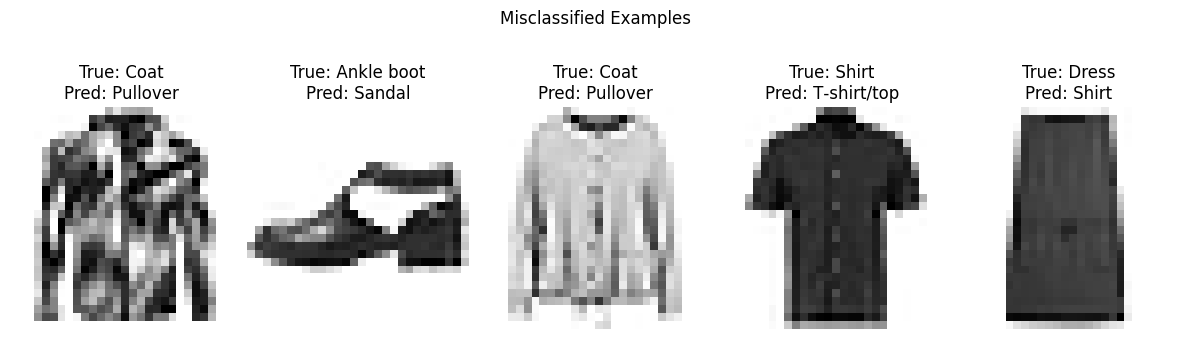

Probabilities for misclassified image 17: [1.4088920e-05 1.6684898e-10 9.9976277e-01 1.6743446e-08 1.8115417e-04
 1.2719944e-12 4.1773481e-05 2.5324574e-09 1.1303686e-07 2.0690839e-10]


In [ ]:
# prompt: Plot some examples the model got wrong—what patterns do you observe?

# Predict probabilities for the test set
predictions = model.predict(x_test)

# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Find misclassified examples
misclassified_indices = np.where(predicted_labels != fy_test)[0]

# Plot some misclassified examples
num_to_plot = 5  # Change this to plot more or fewer examples
fig, axes = plt.subplots(1, num_to_plot, figsize=(12, 4))
fig.suptitle("Misclassified Examples")

for i, ax in enumerate(axes):
    idx = misclassified_indices[i]
    ax.imshow(fx_test[idx], cmap='binary')
    true_label = label_map[fy_test[idx]]
    predicted_label = label_map[predicted_labels[idx]]
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Analyze misclassifications (patterns)
# You might observe patterns like similar shapes being confused (e.g., shirt vs. t-shirt).
# Examine the probabilities for the misclassified images to get a more detailed understanding
# of the model's uncertainty.


# Example of examining probabilities for a misclassified image
example_misclassified_idx = misclassified_indices[0]
probabilities = predictions[example_misclassified_idx]
print(f"Probabilities for misclassified image {example_misclassified_idx}: {probabilities}")




The model was close to the true classification and the images are ambiguous and and could be misclassified by a person as well.